<a href="https://colab.research.google.com/github/MemonML/datascience_bootcamp/blob/main/day_9_lab_practice_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Assignment

The objective of this lab assignment is to perform linear regression on the given "Car
Price Prediction" dataset. In this lab, participants will explore the dataset, preprocess
the data, split it into training and testing sets, build a linear regression model, train the
model, make predictions, and evaluate its performance.
Dataset: You have been provided with the "car_price_data.csv" dataset. This dataset
contains various features of cars, such as mileage, horsepower, number of cylinders,
and other specifications, along with their corresponding prices.
## Tasks:

1. Data Preparation:
- Import the necessary libraries (e.g., pandas, numpy, matplotlib, and scikit-learn).
- Load the "car_price_data.csv" dataset into a pandas DataFrame.
- Explore the dataset: check the dimensions, data types, summary statistics, and the
presence of any missing values.
2. Data Preprocessing:
- Handle missing values, if any, using appropriate techniques (e.g., mean/median
imputation).
- Perform feature scaling (e.g., Min-Max scaling) to standardize the numerical
features.
3. Handling Categorical Features:
- Identify the categorical features in the dataset. These are the features that represent
non-numeric data, such as car make, model, or fuel type.
- Hint: You can use the `pd.get_dummies()` function from pandas to perform one-hot
encoding on the categorical features. This function will create binary vectors for each
category within a categorical feature.
4. Concatenate Transformed Data:
- After one-hot encoding the categorical features, you will have additional binary
columns in the DataFrame.
- Hint: Use the `pd.concat()` function to concatenate the transformed data with the
original DataFrame.
5. Data Splitting:
- Split the dataset into training and testing sets using an 80-20 or 70-30 ratio.
- Separate the target variable (car prices) from the rest of the features in both the
training and testing sets.
6. Model Building:
- Create an instance of the linear regression model from scikit-learn.
- Train the model using the training data.
7. Model Evaluation:
- Make predictions on the testing data using the trained model.
- Evaluate the model's performance using appropriate metrics (e.g., Mean Absolute
Error (MAE), Mean Squared Error (MSE), and R-squared score).
- Interpret the results and discuss the model's performance.
8. Predictions:
- Use the trained model to predict the prices of cars with new feature values. For
example, predict the price of a car with specific mileage, horsepower, fuel type, etc.

###Conclusion:
Summarize your findings from the lab, including insights gained from the data
exploration, preprocessing, model training, and evaluation. Discuss the impact of
one-hot encoding on the model's performance and how it handles categorical features
effectively. Also, mention any challenges faced during the preprocessing or modeling
stages and potential ways to overcome them.
#### Note to students:
Ensure to include comments in your code for better understanding and readability.
Experiment with different settings, feature engineering techniques, or test/train split ratio
to gain a better understanding of linear regression.



In [ ]:
# 1.1 Data Preparation: Importing Libraries
import numpy as np  # For arrays
import pandas as pd # For Data frames and Series
import matplotlib.pyplot as plt  # For ploting
from sklearn.model_selection import train_test_split # Spliting, Training, Testing Datset
from sklearn.linear_model import LinearRegression # Model
import seaborn as sns #Making Colorful graphs
from sklearn.metrics import mean_squared_error,r2_score # Import Metrics Mean square Error

In [ ]:
# 1.2 load the data set into pandas data fram
data = pd.read_csv("/content/drive/MyDrive/Data Science Boot Camp/week2/day_9/data_sets/CarPrice_Assignment.csv")

In [ ]:
# 1.3 Exploring the data set: head() method returns a specified number of rows, string from the top.
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
# 1.3 Exploring the data set: tail() method returns a specified number of last rows.
data.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [ ]:
# 1.3 Exploring the data set: to fetch the dimensions of Pandas and NumPy type objects in python
data.shape

(205, 26)

In [ ]:
# 1.3 Exploring the data set: calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame
a = data.describe()
print(a)
type(a)

           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844

pandas.core.frame.DataFrame

In [ ]:
#3. Handling Categorical Features:
###- Identify the categorical features in the dataset. These are the features that represent
### non-numeric data, such as car make, model, or fuel type.

categorical_features = data.select_dtypes(include=['object']).columns.tolist()

print(categorical_features)
type(categorical_features)


['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


list

In [ ]:
# encoding the text data with numerical values
data_encod=pd.get_dummies(data, columns= categorical_features)
print(data_encoded)

     car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0         1          3       88.6      168.8      64.1       48.8        2548   
1         2          3       88.6      168.8      64.1       48.8        2548   
2         3          1       94.5      171.2      65.5       52.4        2823   
3         4          2       99.8      176.6      66.2       54.3        2337   
4         5          2       99.4      176.6      66.4       54.3        2824   
..      ...        ...        ...        ...       ...        ...         ...   
200     201         -1      109.1      188.8      68.9       55.5        2952   
201     202         -1      109.1      188.8      68.8       55.5        3049   
202     203         -1      109.1      188.8      68.9       55.5        3012   
203     204         -1      109.1      188.8      68.9       55.5        3217   
204     205         -1      109.1      188.8      68.9       55.5        3062   

     enginesize  boreratio 

In [ ]:
# Dropping the columns having text (categorical_features)
droped=data.drop(columns=categorical_features)
print(droped)

     car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0         1          3       88.6      168.8      64.1       48.8        2548   
1         2          3       88.6      168.8      64.1       48.8        2548   
2         3          1       94.5      171.2      65.5       52.4        2823   
3         4          2       99.8      176.6      66.2       54.3        2337   
4         5          2       99.4      176.6      66.4       54.3        2824   
..      ...        ...        ...        ...       ...        ...         ...   
200     201         -1      109.1      188.8      68.9       55.5        2952   
201     202         -1      109.1      188.8      68.8       55.5        3049   
202     203         -1      109.1      188.8      68.9       55.5        3012   
203     204         -1      109.1      188.8      68.9       55.5        3217   
204     205         -1      109.1      188.8      68.9       55.5        3062   

     enginesize  boreratio 

In [ ]:
# Visualizing the data_encoded
print(data_encod)

     car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0         1          3       88.6      168.8      64.1       48.8        2548   
1         2          3       88.6      168.8      64.1       48.8        2548   
2         3          1       94.5      171.2      65.5       52.4        2823   
3         4          2       99.8      176.6      66.2       54.3        2337   
4         5          2       99.4      176.6      66.4       54.3        2824   
..      ...        ...        ...        ...       ...        ...         ...   
200     201         -1      109.1      188.8      68.9       55.5        2952   
201     202         -1      109.1      188.8      68.8       55.5        3049   
202     203         -1      109.1      188.8      68.9       55.5        3012   
203     204         -1      109.1      188.8      68.9       55.5        3217   
204     205         -1      109.1      188.8      68.9       55.5        3062   

     enginesize  boreratio 

In [ ]:
# Concatenating the values=  (dropped= orginal data set without the textual columns/categorical data) + (encoded values of categorical data)
concatenated_data = pd.concat([droped, data_encod], axis=1)
print(concatenated_data)

     car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0         1          3       88.6      168.8      64.1       48.8        2548   
1         2          3       88.6      168.8      64.1       48.8        2548   
2         3          1       94.5      171.2      65.5       52.4        2823   
3         4          2       99.8      176.6      66.2       54.3        2337   
4         5          2       99.4      176.6      66.4       54.3        2824   
..      ...        ...        ...        ...       ...        ...         ...   
200     201         -1      109.1      188.8      68.9       55.5        2952   
201     202         -1      109.1      188.8      68.8       55.5        3049   
202     203         -1      109.1      188.8      68.9       55.5        3012   
203     204         -1      109.1      188.8      68.9       55.5        3217   
204     205         -1      109.1      188.8      68.9       55.5        3062   

     enginesize  boreratio 

In [ ]:
# Splitting the data in to training and testing sets


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder ()
# df=pd.DataFrame
# Data['fueltype', 'aspiration']= labelencoder.fit_transform(data['fueltype'.aspiration])
data['fueltype']= labelencoder.fit_transform(data['fueltype'])
data['aspirtation']= labelencoder.fit_transform(data['aspiration'])
data['carbody']= labelencoder.fit_transform(data['carbody'])
data['drivewheel']= labelencoder.fit_transform(data['drivewheel'])
data['enginelocation']= labelencoder.fit_transform(data['fuelsystem'])
data['fuelsystem']= labelencoder.fit_transform(data['carbody'])
data['enginetype']= labelencoder.fit_transform(data['enginetype'])
data['cylindernumber']= labelencoder.fit_transform(data['cylindernumber'])
data['CarName']= labelencoder.fit_transform(data['CarName'])
data['doornumber']= labelencoder.fit_transform(data['doornumber'])

data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,aspirtation
0,1,3,2,1,std,1,0,0,0,88.6,...,0,3.47,2.68,9.0,111,5000,21,27,13495.0,0
1,2,3,3,1,std,1,0,0,0,88.6,...,0,3.47,2.68,9.0,111,5000,21,27,16500.0,0
2,3,1,1,1,std,1,2,2,2,94.5,...,2,2.68,3.47,9.0,154,5000,19,26,16500.0,0
3,4,2,4,1,std,0,3,3,3,99.8,...,3,3.19,3.40,10.0,102,5500,24,30,13950.0,0
4,5,2,5,1,std,0,3,3,3,99.4,...,3,3.19,3.40,8.0,115,5500,18,22,17450.0,0


<ipython-input-124-2457ad364616>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=data.corr()
<ipython-input-124-2457ad364616>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  g=sns.heatmap(data.corr(),annot=True, cmap="YlGnBu")


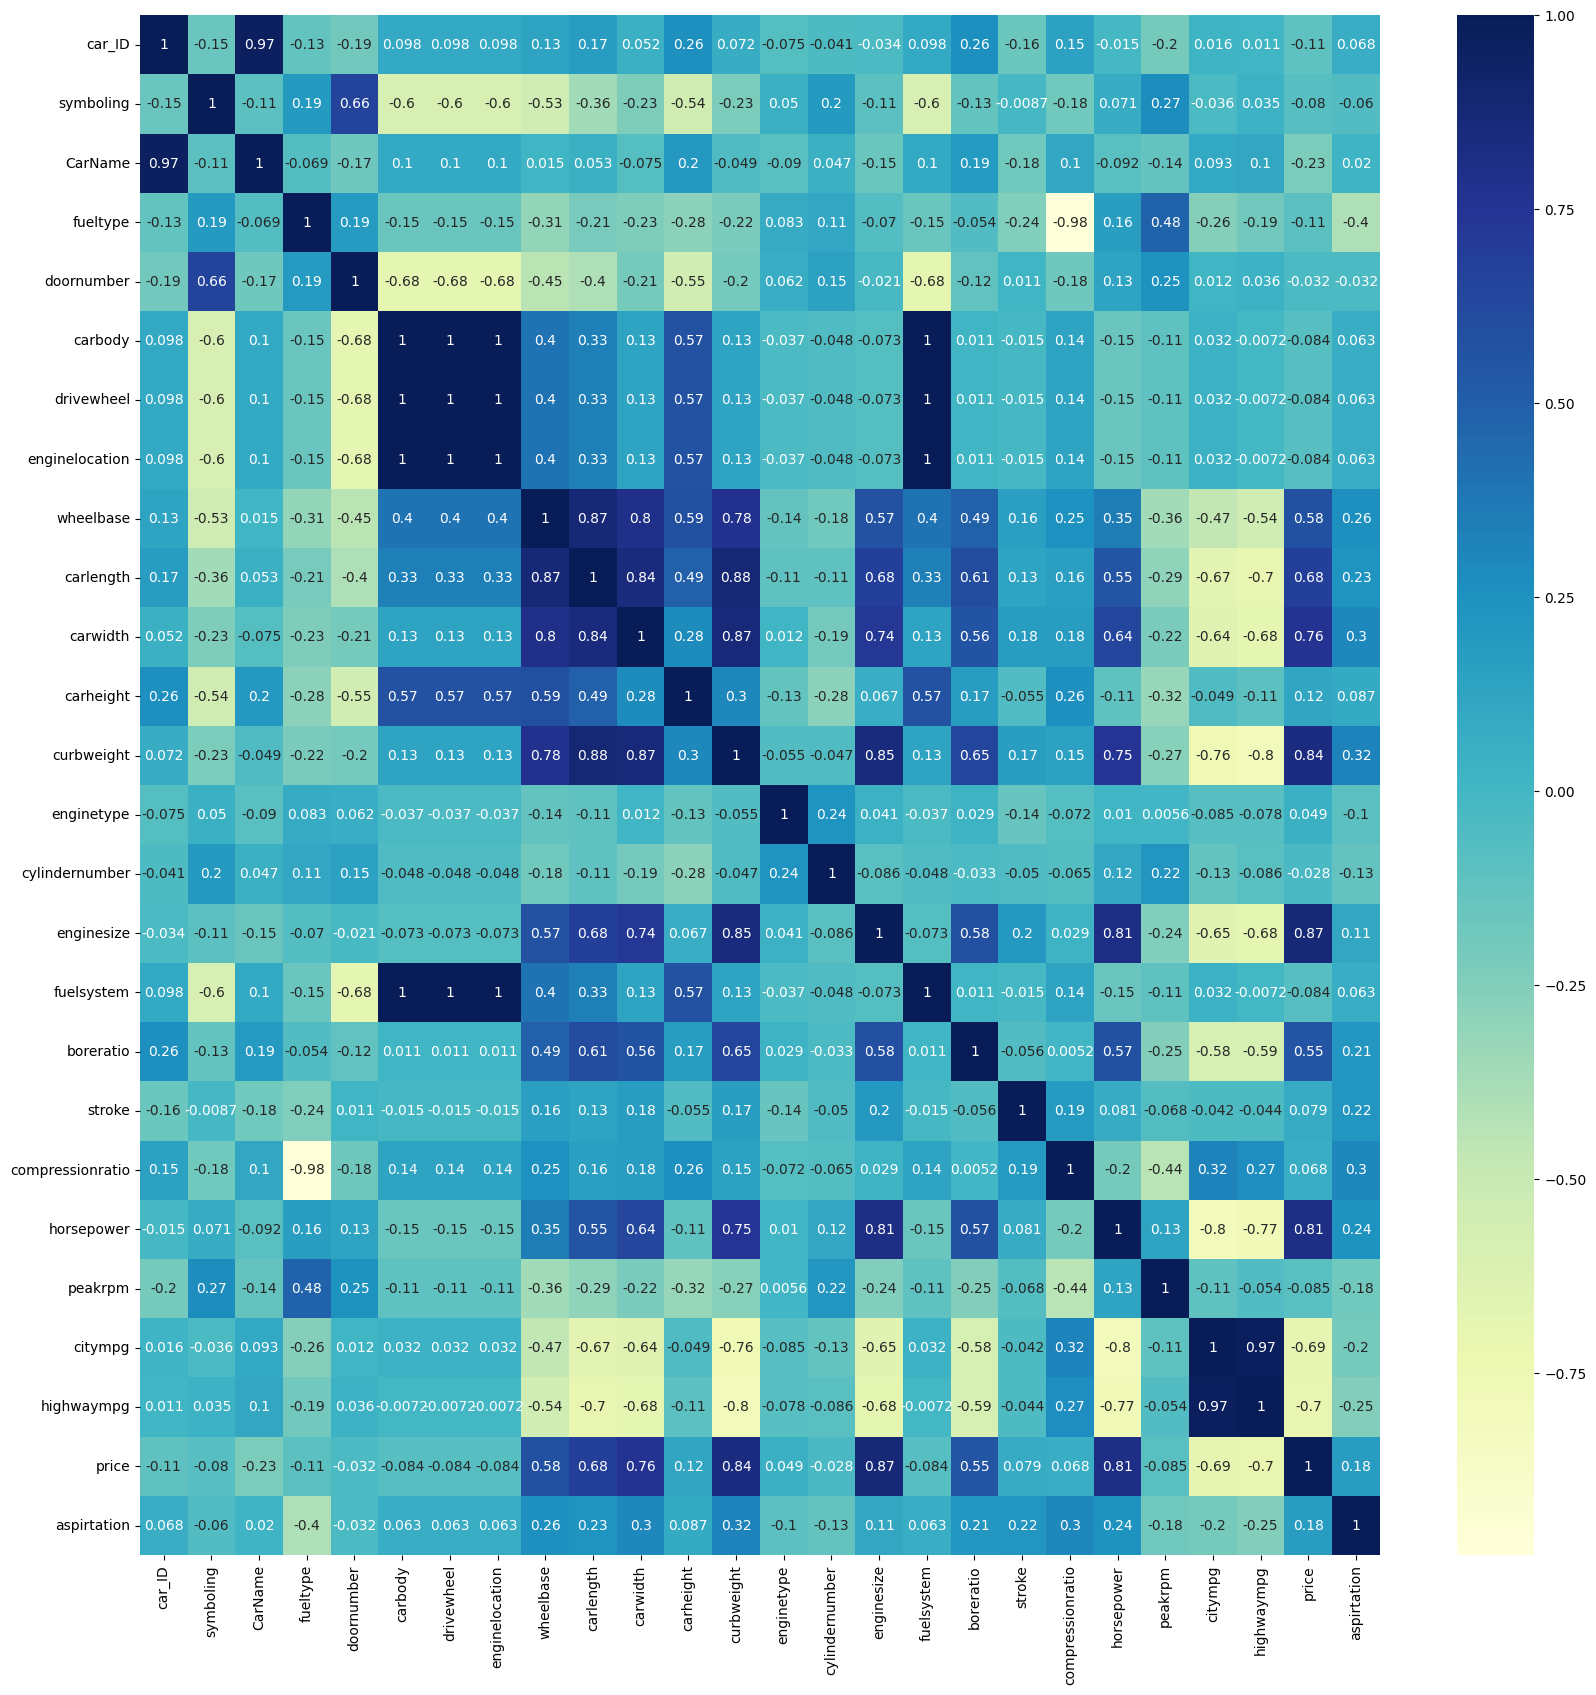

In [ ]:
corrmat=data.corr()
top_corr_features= corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data.corr(),annot=True, cmap="YlGnBu")
# print(top_corr_features)
# g=sns.heatmap(data[top_corr_features[1:5]])

In [ ]:
X = data['curbweight'].values.reshape(-1,1)
Y = data['price'].values.reshape(-1,1)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=100)

In [ ]:
X_train.shape

(143, 1)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(Y_test,y_pred)
r2 = r2_score(Y_test,y_pred)

In [ ]:
print("Mean Squared Error: ", mse)
print("R^2 Score: ", r2)

Mean Squared Error:  27762798.404041067
R^2 Score:  0.6035533826480755


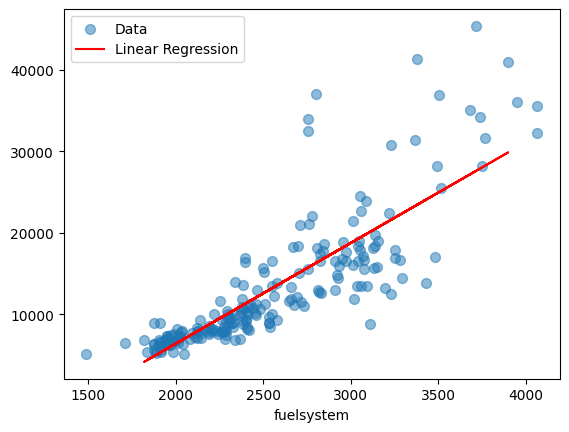

In [ ]:
plt.scatter(X, Y, s=50, alpha=0.5, label='Data')
plt.plot(X_test, y_pred, color='red', label='Linear Regression')
plt.xlabel('fuelsystem')
plt.legend()
plt.show()